In [1]:
#Data wrangling AAC data-set
import pandas as pd
import numpy as np
import datetime
from dateutil.relativedelta import relativedelta
from datetime import date
import matplotlib.pyplot as plt

In [2]:
aac = pd.read_csv("../Documents/aac_intakes_outcomes.csv", usecols=['outcome_datetime', 'intake_datetime', 'outcome_type', 'animal_type', 'breed', 'date_of_birth'])
aac.head()

,date_of_birth,outcome_type,outcome_datetime,animal_type,breed,intake_datetime
0,2007-07-09 00:00:00,Return to Owner,2017-12-07 14:07:00,Dog,Spinone Italiano Mix,2017-12-07 00:00:00
1,2007-07-09 00:00:00,Return to Owner,2014-12-20 16:35:00,Dog,Spinone Italiano Mix,2014-12-19 10:21:00
2,2007-07-09 00:00:00,Return to Owner,2014-03-08 17:10:00,Dog,Spinone Italiano Mix,2014-03-07 14:26:00
3,2004-04-02 00:00:00,Transfer,2014-04-07 15:12:00,Dog,Dachshund,2014-04-02 15:55:00
4,1997-10-16 00:00:00,Return to Owner,2013-11-16 11:54:00,Dog,Shetland Sheepdog,2013-11-16 09:02:00


In [3]:
aac['outcome_datetime'] = pd.to_datetime(aac['outcome_datetime'])
aac['intake_datetime'] = pd.to_datetime(aac['intake_datetime'])

In [4]:
aac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79672 entries, 0 to 79671
Data columns (total 6 columns):
date_of_birth       79672 non-null object
outcome_type        79662 non-null object
outcome_datetime    79672 non-null datetime64[ns]
animal_type         79672 non-null object
breed               79672 non-null object
intake_datetime     79672 non-null datetime64[ns]
dtypes: datetime64[ns](2), object(4)
memory usage: 3.6+ MB


In [5]:
#created a columne to show length of stay at shelter
aac['shelter_length'] = (aac['outcome_datetime'] - aac['intake_datetime'])
aac.head()

,date_of_birth,outcome_type,outcome_datetime,animal_type,breed,intake_datetime,shelter_length
0,2007-07-09 00:00:00,Return to Owner,2017-12-07 14:07:00,Dog,Spinone Italiano Mix,2017-12-07 00:00:00,0 days 14:07:00
1,2007-07-09 00:00:00,Return to Owner,2014-12-20 16:35:00,Dog,Spinone Italiano Mix,2014-12-19 10:21:00,1 days 06:14:00
2,2007-07-09 00:00:00,Return to Owner,2014-03-08 17:10:00,Dog,Spinone Italiano Mix,2014-03-07 14:26:00,1 days 02:44:00
3,2004-04-02 00:00:00,Transfer,2014-04-07 15:12:00,Dog,Dachshund,2014-04-02 15:55:00,4 days 23:17:00
4,1997-10-16 00:00:00,Return to Owner,2013-11-16 11:54:00,Dog,Shetland Sheepdog,2013-11-16 09:02:00,0 days 02:52:00


In [6]:
#removed return to owner as this implies dog ran away and was sent to shelter as lost dog(null value)
aac = aac[aac.outcome_type != 'Return to Owner']
aac.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64881 entries, 3 to 79671
Data columns (total 7 columns):
date_of_birth       64881 non-null object
outcome_type        64871 non-null object
outcome_datetime    64881 non-null datetime64[ns]
animal_type         64881 non-null object
breed               64881 non-null object
intake_datetime     64881 non-null datetime64[ns]
shelter_length      64881 non-null timedelta64[ns]
dtypes: datetime64[ns](2), object(4), timedelta64[ns](1)
memory usage: 4.0+ MB


In [9]:
aac['shelter_length'] = aac['shelter_length'].astype('timedelta64[W]')


In [10]:
aac['shelter_length'] = aac['shelter_length'] / np.timedelta64(1,'W')

In [11]:
#rounded the shelther length column to weeks for comparison but may need to change to month - lowest is 0 and highest is 181
aac.head()

,date_of_birth,outcome_type,outcome_datetime,animal_type,breed,intake_datetime,shelter_length
3,2004-04-02 00:00:00,Transfer,2014-04-07 15:12:00,Dog,Dachshund,2014-04-02 15:55:00,0.0
11,2000-01-21 00:00:00,Transfer,2014-12-22 15:23:00,Cat,American Shorthair Mix,2014-12-08 12:30:00,2.0
12,1997-10-03 00:00:00,Adoption,2013-11-22 09:44:00,Dog,Dachshund Mix,2013-10-03 15:47:00,7.0
13,2000-04-27 00:00:00,Euthanasia,2015-02-17 16:25:00,Dog,Border Collie Mix,2015-02-17 13:17:00,0.0
14,1999-06-01 00:00:00,Adoption,2016-10-07 12:34:00,Dog,Chihuahua Shorthair,2016-09-28 12:05:00,1.0


In [12]:
aac['date_of_birth'] = pd.to_datetime(aac['date_of_birth'])
aac['age_of_outcome'] = (aac['outcome_datetime'] - aac['date_of_birth'])

In [13]:
aac.head()

,date_of_birth,outcome_type,outcome_datetime,animal_type,breed,intake_datetime,shelter_length,age_of_outcome
3,2004-04-02,Transfer,2014-04-07 15:12:00,Dog,Dachshund,2014-04-02 15:55:00,0.0,3657 days 15:12:00
11,2000-01-21,Transfer,2014-12-22 15:23:00,Cat,American Shorthair Mix,2014-12-08 12:30:00,2.0,5449 days 15:23:00
12,1997-10-03,Adoption,2013-11-22 09:44:00,Dog,Dachshund Mix,2013-10-03 15:47:00,7.0,5894 days 09:44:00
13,2000-04-27,Euthanasia,2015-02-17 16:25:00,Dog,Border Collie Mix,2015-02-17 13:17:00,0.0,5409 days 16:25:00
14,1999-06-01,Adoption,2016-10-07 12:34:00,Dog,Chihuahua Shorthair,2016-09-28 12:05:00,1.0,6338 days 12:34:00


In [16]:
#calculating the age of the animal at outcome so that this can be sorted on - calculating based on years
aac['age_of_outcome'] = aac['age_of_outcome'].astype('timedelta64[Y]')

In [17]:
aac['age_of_outcome'] = aac['age_of_outcome'] / np.timedelta64(1,'Y')

In [18]:
aac.head()

,date_of_birth,outcome_type,outcome_datetime,animal_type,breed,intake_datetime,shelter_length,age_of_outcome
3,2004-04-02,Transfer,2014-04-07 15:12:00,Dog,Dachshund,2014-04-02 15:55:00,0.0,10.0
11,2000-01-21,Transfer,2014-12-22 15:23:00,Cat,American Shorthair Mix,2014-12-08 12:30:00,2.0,14.0
12,1997-10-03,Adoption,2013-11-22 09:44:00,Dog,Dachshund Mix,2013-10-03 15:47:00,7.0,16.0
13,2000-04-27,Euthanasia,2015-02-17 16:25:00,Dog,Border Collie Mix,2015-02-17 13:17:00,0.0,14.0
14,1999-06-01,Adoption,2016-10-07 12:34:00,Dog,Chihuahua Shorthair,2016-09-28 12:05:00,1.0,17.0


In [19]:
aac = aac.sort_values(['age_of_outcome'])
aac.head()

,date_of_birth,outcome_type,outcome_datetime,animal_type,breed,intake_datetime,shelter_length,age_of_outcome
66636,2017-07-01,Euthanasia,2017-05-12 16:43:00,Cat,Domestic Shorthair Mix,2017-05-12 15:50:00,0.0,-1.0
35969,2015-07-06,Transfer,2015-07-05 14:46:00,Cat,Domestic Shorthair Mix,2015-07-05 13:25:00,0.0,-1.0
57630,2016-10-28,Transfer,2016-10-04 15:13:00,Cat,Domestic Shorthair Mix,2016-10-04 12:49:00,0.0,-1.0
68511,2014-12-12,Adoption,2014-09-10 17:29:00,Dog,Border Collie Mix,2014-09-09 11:02:00,0.0,-1.0
32209,2015-08-29,Adoption,2015-05-24 17:01:00,Cat,Domestic Shorthair Mix,2015-05-12 12:37:00,1.0,-1.0


In [20]:
#removed ages that are -1 aprox 5 as most likely human error
aac = aac[aac.age_of_outcome != -1.0]
aac.head()


,date_of_birth,outcome_type,outcome_datetime,animal_type,breed,intake_datetime,shelter_length,age_of_outcome
39561,2015-04-06,Transfer,2015-09-21 15:56:00,Cat,Domestic Shorthair Mix,2015-09-12 12:17:00,1.0,0.0
35002,2015-05-20,Adoption,2015-08-25 08:13:00,Cat,Domestic Shorthair Mix,2015-06-20 14:25:00,9.0,0.0
64776,2016-08-03,Adoption,2017-04-10 18:55:00,Cat,Domestic Shorthair Mix,2017-04-03 16:27:00,1.0,0.0
35004,2015-05-05,Adoption,2015-07-01 18:00:00,Cat,Domestic Shorthair Mix,2015-06-20 14:30:00,1.0,0.0
35006,2015-05-11,Died,2015-06-27 08:36:00,Cat,Domestic Shorthair Mix,2015-06-20 14:37:00,0.0,0.0


In [21]:
aac.tail()

,date_of_birth,outcome_type,outcome_datetime,animal_type,breed,intake_datetime,shelter_length,age_of_outcome
68455,1997-06-11,Euthanasia,2017-06-12 11:04:00,Cat,Domestic Shorthair Mix,2017-06-11 11:16:00,0.0,20.0
23051,1994-10-11,Euthanasia,2014-10-11 17:58:00,Cat,Domestic Medium Hair Mix,2014-10-11 17:26:00,0.0,20.0
60535,1996-12-11,Transfer,2016-12-16 00:00:00,Bird,Cockatoo,2016-12-11 14:55:00,0.0,20.0
63649,1995-03-06,Euthanasia,2017-03-06 17:09:00,Cat,Domestic Shorthair Mix,2017-03-06 16:31:00,0.0,22.0
60536,1991-12-11,Transfer,2016-12-16 00:00:00,Bird,Cockatoo,2016-12-11 14:55:00,0.0,25.0


In [22]:
#checking for any null values - see that outcome_type contains some
aac.isna().any()

date_of_birth       False
outcome_type         True
outcome_datetime    False
animal_type         False
breed               False
intake_datetime     False
shelter_length      False
age_of_outcome      False
dtype: bool

In [23]:
#used sort_values to isolate the Nan values
aac['outcome_type'].isna().sort_values().tail(20)

16566    False
16568    False
70554    False
16528    False
16526    False
70584    False
16574    False
60536    False
70572    False
16478    False
59034     True
20020     True
63150     True
71335     True
71341     True
11057     True
9016      True
71339     True
14583     True
44097     True
Name: outcome_type, dtype: bool

In [24]:
aac.loc[11057]

date_of_birth       2014-03-09 00:00:00
outcome_type                        NaN
outcome_datetime    2014-03-09 18:15:00
animal_type                       Other
breed                           Bat Mix
intake_datetime     2014-03-09 16:38:00
shelter_length                        0
age_of_outcome                        0
Name: 11057, dtype: object

In [25]:
#since only 10 entries had Nan values, I decided to drop, especially since entries seemed inconsistent upon reviewing
aac = aac.dropna(subset = ['outcome_type'])

In [26]:
aac.isna().any()

date_of_birth       False
outcome_type        False
outcome_datetime    False
animal_type         False
breed               False
intake_datetime     False
shelter_length      False
age_of_outcome      False
dtype: bool

In [27]:
#noticed that animal type contained Other and Bird, which was not useful to this problem. I excluded them so that data will only reflect Cats and dogs
aac = aac[aac.animal_type != 'Other']
aac = aac[aac.animal_type != 'Bird']
aac.head()

,date_of_birth,outcome_type,outcome_datetime,animal_type,breed,intake_datetime,shelter_length,age_of_outcome
39561,2015-04-06,Transfer,2015-09-21 15:56:00,Cat,Domestic Shorthair Mix,2015-09-12 12:17:00,1.0,0.0
35002,2015-05-20,Adoption,2015-08-25 08:13:00,Cat,Domestic Shorthair Mix,2015-06-20 14:25:00,9.0,0.0
64776,2016-08-03,Adoption,2017-04-10 18:55:00,Cat,Domestic Shorthair Mix,2017-04-03 16:27:00,1.0,0.0
35004,2015-05-05,Adoption,2015-07-01 18:00:00,Cat,Domestic Shorthair Mix,2015-06-20 14:30:00,1.0,0.0
35006,2015-05-11,Died,2015-06-27 08:36:00,Cat,Domestic Shorthair Mix,2015-06-20 14:37:00,0.0,0.0


In [28]:
# data story telling portion
# reviewing the data,  majority of animals were adopted, which is expected. may need to remove additional columns such as 
# disposal and Rto-adopt as not sure that they are relevant for data
aac.groupby(['animal_type', 'outcome_type']).count()

date_of_birth  outcome_datetime  breed  \
animal_type outcome_type                                           
Cat         Adoption              12673             12673  12673   
            Died                    402               402    402   
            Disposal                 13                13     13   
            Euthanasia             1474              1474   1474   
            Missing                  29                29     29   
            Rto-Adopt                36                36     36   
            Transfer              13433             13433  13433   
Dog         Adoption              20580             20580  20580   
            Died                    142               142    142   
            Disposal                 10                10     10   
            Euthanasia             1502              1502   1502   
            Missing                  16                16     16   
            Rto-Adopt               143               143    143   
            Transfer               9697              9697   9697   

                          intake_datetime  shelter_length  age_of_outcome  
animal_type outcome_type                                                   
Cat         Adoption                12673           12673           12673  
            Died                      402             402             402  
            Disposal                   13              13              13  
            Euthanasia               1474            1474            1474  
            Missing                    29              29              29  
            Rto-Adopt                  36              36              36  
            Transfer                13433           13433           13433  
Dog         Adoption                20580           20580           20580  
            Died                      142             142             142  
            Disposal                   10              10              10  
            Euthanasia               1502            1502            1502  
            Missing                    16              16              16  
            Rto-Adopt                 143             143             143  
            Transfer                 9697            9697            9697

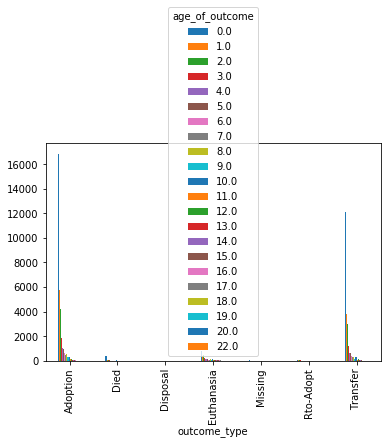

In [29]:
#grouping by outcome type and age of outcome to be able to compare. as expected large amount of animals aged 0-4 were adopted

aac.groupby(['outcome_type','age_of_outcome'])['outcome_type'].count().unstack().plot(kind='bar')
plt.show()


In [30]:
bins = pd.IntervalIndex.from_tuples([(-1,1), (1.0, 2.0), (2, 3), (3, 5), (5,8), (8,11), (11,23)])
aac['age_category'] = pd.cut(aac['age_of_outcome'], bins)
aac.head()

,date_of_birth,outcome_type,outcome_datetime,animal_type,breed,intake_datetime,shelter_length,age_of_outcome,age_category
39561,2015-04-06,Transfer,2015-09-21 15:56:00,Cat,Domestic Shorthair Mix,2015-09-12 12:17:00,1.0,0.0,"(-1.0, 1.0]"
35002,2015-05-20,Adoption,2015-08-25 08:13:00,Cat,Domestic Shorthair Mix,2015-06-20 14:25:00,9.0,0.0,"(-1.0, 1.0]"
64776,2016-08-03,Adoption,2017-04-10 18:55:00,Cat,Domestic Shorthair Mix,2017-04-03 16:27:00,1.0,0.0,"(-1.0, 1.0]"
35004,2015-05-05,Adoption,2015-07-01 18:00:00,Cat,Domestic Shorthair Mix,2015-06-20 14:30:00,1.0,0.0,"(-1.0, 1.0]"
35006,2015-05-11,Died,2015-06-27 08:36:00,Cat,Domestic Shorthair Mix,2015-06-20 14:37:00,0.0,0.0,"(-1.0, 1.0]"


In [31]:
bins = pd.IntervalIndex.from_tuples([(-1,1), (1.0, 2.0), (2, 3), (3, 5), (5,8), (8,11), (11,23)])
aac['shelter_bin'] = pd.cut(aac['shelter_length'], bins)
aac.head()

,date_of_birth,outcome_type,outcome_datetime,animal_type,breed,intake_datetime,shelter_length,age_of_outcome,age_category,shelter_bin
39561,2015-04-06,Transfer,2015-09-21 15:56:00,Cat,Domestic Shorthair Mix,2015-09-12 12:17:00,1.0,0.0,"(-1.0, 1.0]","(-1.0, 1.0]"
35002,2015-05-20,Adoption,2015-08-25 08:13:00,Cat,Domestic Shorthair Mix,2015-06-20 14:25:00,9.0,0.0,"(-1.0, 1.0]","(8.0, 11.0]"
64776,2016-08-03,Adoption,2017-04-10 18:55:00,Cat,Domestic Shorthair Mix,2017-04-03 16:27:00,1.0,0.0,"(-1.0, 1.0]","(-1.0, 1.0]"
35004,2015-05-05,Adoption,2015-07-01 18:00:00,Cat,Domestic Shorthair Mix,2015-06-20 14:30:00,1.0,0.0,"(-1.0, 1.0]","(-1.0, 1.0]"
35006,2015-05-11,Died,2015-06-27 08:36:00,Cat,Domestic Shorthair Mix,2015-06-20 14:37:00,0.0,0.0,"(-1.0, 1.0]","(-1.0, 1.0]"


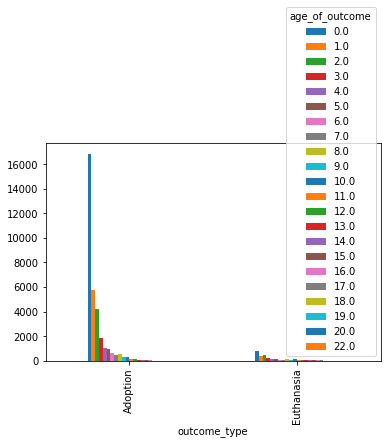

In [32]:
#wanted to review outcome types adoption and euthanasia for ages as seemed relevant options for study
aac2 = aac.set_index(['outcome_type']).loc[['Adoption', 'Euthanasia']]
aac2.reset_index().groupby(['outcome_type','age_of_outcome'])['age_of_outcome'].count().unstack().plot(kind='bar')
#wanted to see the spread of ages for adoptions and euthanasia - euthanasia very low compared to adoptions
#can clearly see a trend with adoptions - the lower the age, the higher the chance of adoption, harder to see a trend with euthanasia 

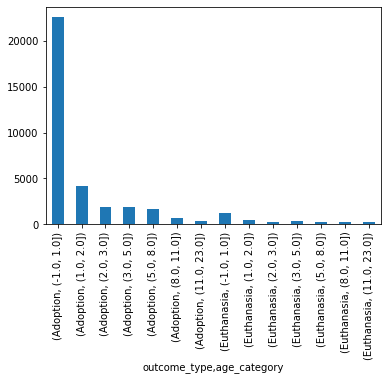

In [33]:
aac2.reset_index().groupby(['outcome_type','age_category'])['outcome_type'].size().plot(kind='bar')
#regrouped the ages into bins to show how adoption and euthanasia are the top outcomes

Text(0.5, 0, 'age of euthanized')

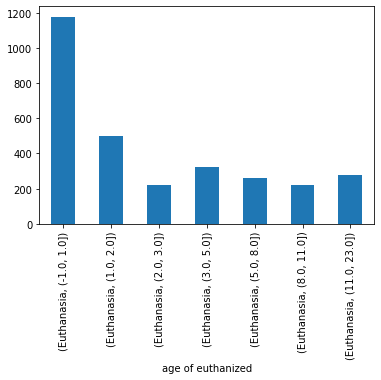

In [34]:
aac3 = aac.set_index(['outcome_type']).loc['Euthanasia']
aac3.reset_index().groupby(['outcome_type', 'age_category'])['age_category'].count().plot(kind='bar')
plt.xlabel('age of euthanized')
#use binning to split the age ranges into more manageable chunks

Text(0.5, 0, 'Euthanasia by age')

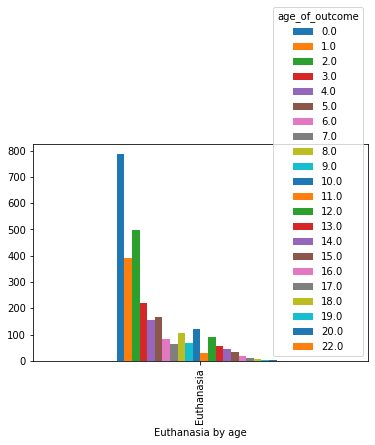

In [35]:
#isolated just the euthanasias to see the distribution of ages
aac3 = aac.set_index(['outcome_type']).loc['Euthanasia']
aac3.reset_index().groupby(['outcome_type','age_of_outcome'])['age_of_outcome'].count().unstack().plot(kind='bar')
plt.xlabel('Euthanasia by age')
#we can see by just reviewing the euthanasia graph that the highest animals euthanized were 0-5 years, which is not what I expected
#perhaps this is due to illness - would be interesting to compare teo shelter length

In [36]:
aac3.reset_index().groupby(['outcome_type','age_of_outcome'])['age_of_outcome'].count()


outcome_type  age_of_outcome
Euthanasia    0.0               787
              1.0               393
              2.0               497
              3.0               220
              4.0               155
              5.0               169
              6.0                84
              7.0                66
              8.0               108
              9.0                67
              10.0              123
              11.0               30
              12.0               93
              13.0               58
              14.0               44
              15.0               34
              16.0               19
              17.0               13
              18.0                6
              19.0                4
              20.0                5
              22.0                1
Name: age_of_outcome, dtype: int64

[]

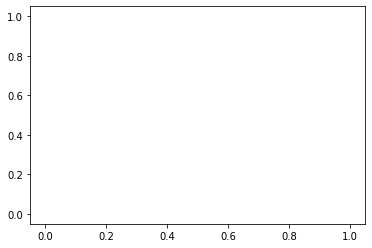

In [37]:
# you can see that the majority of euthanized animals were in the shelter less than 1 year, leading me to think illness/ disease
plt.plot()

Text(0, 0.5, 'age')

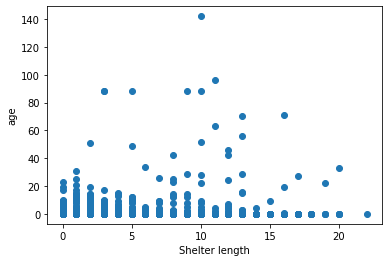

In [38]:
#you can see that the youngest animals euthanized also have the shortest time at the shelter on average
plt.scatter(aac3.age_of_outcome, aac3.shelter_length)
plt.xlabel('Shelter length')
plt.ylabel('age')

In [39]:
#I wanted to investigate the highest amount of animals being euthanized to see if there was any distinctions
#Almost 500 were cats under 1 year - I think there is more to this than just illness, perhaps this is how the 
#shelther deals with large volumes? also interesting is that pit bulls account for 125 of dogs 2 years. interesting 
# this could be due to the breed specifically 
aac3.groupby(['breed', 'age_of_outcome']).count().sort_values(['date_of_birth']).tail()


date_of_birth  outcome_datetime  \
breed                  age_of_outcome                                    
Pit Bull Mix           1.0                        75                75   
                       2.0                       125               125   
Domestic Shorthair Mix 2.0                       145               145   
                       1.0                       161               161   
                       0.0                       487               487   

                                       animal_type  intake_datetime  \
breed                  age_of_outcome                                 
Pit Bull Mix           1.0                      75               75   
                       2.0                     125              125   
Domestic Shorthair Mix 2.0                     145              145   
                       1.0                     161              161   
                       0.0                     487              487   

                                       shelter_length  age_category  \
breed                  age_of_outcome                                 
Pit Bull Mix           1.0                         75            75   
                       2.0                        125           125   
Domestic Shorthair Mix 2.0                        145           145   
                       1.0                        161           161   
                       0.0                        487           487   

                                       shelter_bin  
breed                  age_of_outcome               
Pit Bull Mix           1.0                      75  
                       2.0                     125  
Domestic Shorthair Mix 2.0                     145  
                       1.0                     160  
                       0.0                     487

In [40]:
#wanted to do the same comparison for adoptions - can see that interestingly the cat below 1 accounts for 7500 adoptions
#perhaps the ones euthanized are due to illness as around 6%. You can see that Labrador leads for dogs as does chihuaha
#can clearly see cats take up a lare portion of adoptions
aac4 = aac.set_index(['outcome_type']).loc['Adoption']
aac4.reset_index().groupby(['breed', 'age_of_outcome']).count().sort_values(['date_of_birth']).tail(10)

outcome_type  date_of_birth  \
breed                    age_of_outcome                                
Domestic Shorthair Mix   2.0                      471            471   
Chihuahua Shorthair Mix  1.0                      557            557   
Pit Bull Mix             2.0                      578            578   
                         0.0                      611            611   
                         1.0                      634            634   
Chihuahua Shorthair Mix  0.0                      638            638   
Domestic Shorthair Mix   1.0                      776            776   
Domestic Medium Hair Mix 0.0                      802            802   
Labrador Retriever Mix   0.0                     1274           1274   
Domestic Shorthair Mix   0.0                     7523           7523   

                                         outcome_datetime  animal_type  \
breed                    age_of_outcome                                  
Domestic Shorthair Mix   2.0                          471          471   
Chihuahua Shorthair Mix  1.0                          557          557   
Pit Bull Mix             2.0                          578          578   
                         0.0                          611          611   
                         1.0                          634          634   
Chihuahua Shorthair Mix  0.0                          638          638   
Domestic Shorthair Mix   1.0                          776          776   
Domestic Medium Hair Mix 0.0                          802          802   
Labrador Retriever Mix   0.0                         1274         1274   
Domestic Shorthair Mix   0.0                         7523         7523   

                                         intake_datetime  shelter_length  \
breed                    age_of_outcome                                    
Domestic Shorthair Mix   2.0                         471             471   
Chihuahua Shorthair Mix  1.0                         557             557   
Pit Bull Mix             2.0                         578             578   
                         0.0                         611             611   
                         1.0                         634             634   
Chihuahua Shorthair Mix  0.0                         638             638   
Domestic Shorthair Mix   1.0                         776             776   
Domestic Medium Hair Mix 0.0                         802             802   
Labrador Retriever Mix   0.0                        1274            1274   
Domestic Shorthair Mix   0.0                        7523            7523   

                                         age_category  shelter_bin  
breed                    age_of_outcome                             
Domestic Shorthair Mix   2.0                      471          456  
Chihuahua Shorthair Mix  1.0                      557          554  
Pit Bull Mix             2.0                      578          542  
                         0.0                      611          610  
                         1.0                      634          602  
Chihuahua Shorthair Mix  0.0                      638          635  
Domestic Shorthair Mix   1.0                      776          744  
Domestic Medium Hair Mix 0.0                      802          796  
Labrador Retriever Mix   0.0                     1274         1274  
Domestic Shorthair Mix   0.0                     7523         7445

In [41]:
aac2.groupby(['animal_type', 'breed']).count().tail()

date_of_birth  \
animal_type breed                                                          
Dog         Yorkshire Terrier/Pomeranian                               2   
            Yorkshire Terrier/Rat Terrier                              5   
            Yorkshire Terrier/Shih Tzu                                 2   
            Yorkshire Terrier/Soft Coated Wheaten Terrier              1   
            Yorkshire Terrier/Yorkshire Terrier                        1   

                                                           outcome_datetime  \
animal_type breed                                                             
Dog         Yorkshire Terrier/Pomeranian                                  2   
            Yorkshire Terrier/Rat Terrier                                 5   
            Yorkshire Terrier/Shih Tzu                                    2   
            Yorkshire Terrier/Soft Coated Wheaten Terrier                 1   
            Yorkshire Terrier/Yorkshire Terrier                           1   

                                                           intake_datetime  \
animal_type breed                                                            
Dog         Yorkshire Terrier/Pomeranian                                 2   
            Yorkshire Terrier/Rat Terrier                                5   
            Yorkshire Terrier/Shih Tzu                                   2   
            Yorkshire Terrier/Soft Coated Wheaten Terrier                1   
            Yorkshire Terrier/Yorkshire Terrier                          1   

                                                           shelter_length  \
animal_type breed                                                           
Dog         Yorkshire Terrier/Pomeranian                                2   
            Yorkshire Terrier/Rat Terrier                               5   
            Yorkshire Terrier/Shih Tzu                                  2   
            Yorkshire Terrier/Soft Coated Wheaten Terrier               1   
            Yorkshire Terrier/Yorkshire Terrier                         1   

                                                           age_of_outcome  \
animal_type breed                                                           
Dog         Yorkshire Terrier/Pomeranian                                2   
            Yorkshire Terrier/Rat Terrier                               5   
            Yorkshire Terrier/Shih Tzu                                  2   
            Yorkshire Terrier/Soft Coated Wheaten Terrier               1   
            Yorkshire Terrier/Yorkshire Terrier                         1   

                                                           age_category  \
animal_type breed                                                         
Dog         Yorkshire Terrier/Pomeranian                              2   
            Yorkshire Terrier/Rat Terrier                             5   
            Yorkshire Terrier/Shih Tzu                                2   
            Yorkshire Terrier/Soft Coated Wheaten Terrier             1   
            Yorkshire Terrier/Yorkshire Terrier                       1   

                                                           shelter_bin  
animal_type breed                                                       
Dog         Yorkshire Terrier/Pomeranian                             2  
            Yorkshire Terrier/Rat Terrier                            5  
            Yorkshire Terrier/Shih Tzu                               2  
            Yorkshire Terrier/Soft Coated Wheaten Terrier            1  
            Yorkshire Terrier/Yorkshire Terrier                      1

In [42]:
aac2.groupby(['animal_type']).count()

,date_of_birth,outcome_datetime,breed,intake_datetime,shelter_length,age_of_outcome,age_category,shelter_bin
animal_type,,,,,,,,
Cat,14147,14147,14147,14147,14147,14147,14147,13877
Dog,22082,22082,22082,22082,22082,22082,22082,21612


In [43]:
#after realizing that the cat breeds are throwing off the data, I am
#going to remove cats and review breeds of dogs solely
aac5 = aac3.set_index(['animal_type']).loc['Dog']
aac5.reset_index().groupby(['breed', 'age_of_outcome']).count().sort_values(['date_of_birth']).tail(10)
#this data now shows top dog breeds euhanized by age and breed
#we see pit bull leads the charts

animal_type  date_of_birth  \
breed                   age_of_outcome                               
Chihuahua Shorthair Mix 1.0                      22             22   
Labrador Retriever Mix  0.0                      23             23   
Chihuahua Shorthair Mix 2.0                      28             28   
Pit Bull Mix            5.0                      31             31   
                        4.0                      33             33   
Chihuahua Shorthair Mix 0.0                      33             33   
Pit Bull Mix            0.0                      41             41   
                        3.0                      62             62   
                        1.0                      75             75   
                        2.0                     125            125   

                                        outcome_datetime  intake_datetime  \
breed                   age_of_outcome                                      
Chihuahua Shorthair Mix 1.0                           22               22   
Labrador Retriever Mix  0.0                           23               23   
Chihuahua Shorthair Mix 2.0                           28               28   
Pit Bull Mix            5.0                           31               31   
                        4.0                           33               33   
Chihuahua Shorthair Mix 0.0                           33               33   
Pit Bull Mix            0.0                           41               41   
                        3.0                           62               62   
                        1.0                           75               75   
                        2.0                          125              125   

                                        shelter_length  age_category  \
breed                   age_of_outcome                                 
Chihuahua Shorthair Mix 1.0                         22            22   
Labrador Retriever Mix  0.0                         23            23   
Chihuahua Shorthair Mix 2.0                         28            28   
Pit Bull Mix            5.0                         31            31   
                        4.0                         33            33   
Chihuahua Shorthair Mix 0.0                         33            33   
Pit Bull Mix            0.0                         41            41   
                        3.0                         62            62   
                        1.0                         75            75   
                        2.0                        125           125   

                                        shelter_bin  
breed                   age_of_outcome               
Chihuahua Shorthair Mix 1.0                      22  
Labrador Retriever Mix  0.0                      23  
Chihuahua Shorthair Mix 2.0                      27  
Pit Bull Mix            5.0                      31  
                        4.0                      33  
Chihuahua Shorthair Mix 0.0                      33  
Pit Bull Mix            0.0                      41  
                        3.0                      62  
                        1.0                      75  
                        2.0                     125

Text(0.5, 0, 'Top Dog Euthanasia')

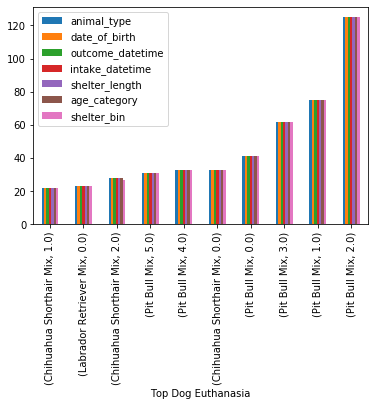

In [44]:
aac5.reset_index().groupby(['breed', 'age_of_outcome']).count().sort_values(['date_of_birth']).tail(10).plot(kind='bar')
plt.xlabel('Top Dog Euthanasia')

In [45]:
#now lets compare the adoptions to see which breeds lead that category
aac6 = aac4.set_index(['animal_type']).loc['Dog']
aac6.reset_index().groupby(['breed', 'age_of_outcome']).count().sort_values(['date_of_birth']).tail(10)

animal_type  date_of_birth  \
breed                     age_of_outcome                               
Australian Cattle Dog Mix 0.0                     281            281   
German Shepherd Mix       0.0                     349            349   
Chihuahua Shorthair Mix   2.0                     434            434   
Labrador Retriever Mix    1.0                     442            442   
Chihuahua Shorthair Mix   1.0                     557            557   
Pit Bull Mix              2.0                     578            578   
                          0.0                     611            611   
                          1.0                     634            634   
Chihuahua Shorthair Mix   0.0                     638            638   
Labrador Retriever Mix    0.0                    1274           1274   

                                          outcome_datetime  intake_datetime  \
breed                     age_of_outcome                                      
Australian Cattle Dog Mix 0.0                          281              281   
German Shepherd Mix       0.0                          349              349   
Chihuahua Shorthair Mix   2.0                          434              434   
Labrador Retriever Mix    1.0                          442              442   
Chihuahua Shorthair Mix   1.0                          557              557   
Pit Bull Mix              2.0                          578              578   
                          0.0                          611              611   
                          1.0                          634              634   
Chihuahua Shorthair Mix   0.0                          638              638   
Labrador Retriever Mix    0.0                         1274             1274   

                                          shelter_length  age_category  \
breed                     age_of_outcome                                 
Australian Cattle Dog Mix 0.0                        281           281   
German Shepherd Mix       0.0                        349           349   
Chihuahua Shorthair Mix   2.0                        434           434   
Labrador Retriever Mix    1.0                        442           442   
Chihuahua Shorthair Mix   1.0                        557           557   
Pit Bull Mix              2.0                        578           578   
                          0.0                        611           611   
                          1.0                        634           634   
Chihuahua Shorthair Mix   0.0                        638           638   
Labrador Retriever Mix    0.0                       1274          1274   

                                          shelter_bin  
breed                     age_of_outcome               
Australian Cattle Dog Mix 0.0                     280  
German Shepherd Mix       0.0                     349  
Chihuahua Shorthair Mix   2.0                     431  
Labrador Retriever Mix    1.0                     436  
Chihuahua Shorthair Mix   1.0                     554  
Pit Bull Mix              2.0                     542  
                          0.0                     610  
                          1.0                     602  
Chihuahua Shorthair Mix   0.0                     635  
Labrador Retriever Mix    0.0                    1274

Text(0.5, 0, 'Top Dog Adoptions')

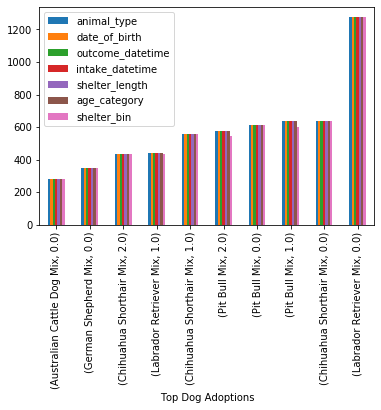

In [46]:
aac6.reset_index().groupby(['breed', 'age_of_outcome']).count().sort_values(['date_of_birth']).tail(10).plot(kind='bar')
plt.xlabel('Top Dog Adoptions')

In [ ]:
#inferential statisitcs section:
#variables that are significant to project question = age, breed of dog
#there are significant differences between age and breed that may impact project aim
#strong correlations between variables = age and breed
#test to analyze these relationships: 

In [51]:
#calculating the covarian between shelter length and age of outcome
#can't calculate breed as they are strings - need to be ints
cov_matrix = np.cov(aac6['shelter_length'], aac6['age_of_outcome'])
shelter_cov = cov_matrix[0,1]
print(shelter_cov)

3.977211477011651


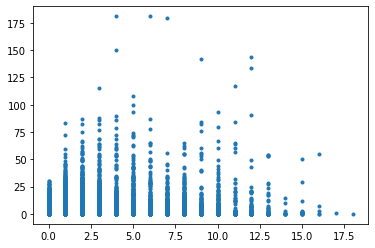

In [73]:
_ = plt.plot(aac6['age_of_outcome'], aac6['shelter_length'], marker='.', linestyle='none')
plt.show()

In [58]:
a, b = np.polyfit(aac6['age_of_outcome'], aac6['shelter_length'], 1)

In [59]:
print(a)

0.669662940413562


In [61]:
print(b)

1.7771704478685182


In [70]:
# Make theoretical line to plot
x = np.array([0,100])
y = a * x + b

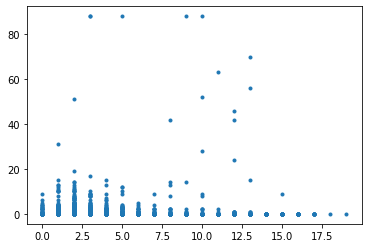

In [69]:
_ = plt.plot(aac5['age_of_outcome'], aac5['shelter_length'], marker='.', linestyle='none')
_ = plt.plot(c,d)
plt.show()

In [66]:
c, d = np.polyfit(aac5['age_of_outcome'], aac5['shelter_length'], 1)

In [67]:
print(c)

0.05175131165394166


In [68]:
print(d)

1.3800492012455772


In [78]:
#calculating the mean and SD of shelter length for adoptions
shelter_mean = np.mean(aac6['shelter_length'])
shelter_std = np.std(aac6['shelter_length'])

In [105]:
#one thing we could test is the rate of adoptions against euthanizations
#I could perform a sample of a binomial distribution and use the probablity 
#of getting adopted against the number of total animals
total_adopt = len(aac6)
total_euth = len(aac5)
prob_adopt = len(aac6)/ (len(aac6) + len(aac5))

In [106]:
print(prob_adopt)

0.9319807988406847


In [107]:
n_adopt = np.random.binomial(100, prob_adopt, size=10000)

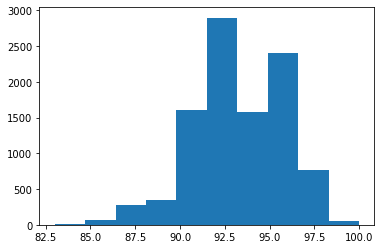

In [109]:
_ = plt.hist(n_adopt)

In [110]:
#need to computer ECDF of above binomial distribution
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

In [111]:
x, y = ecdf(n_adopt)

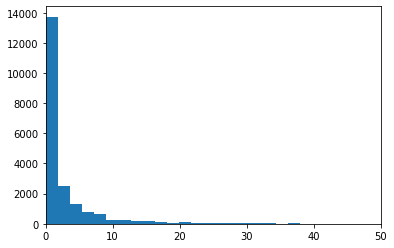

In [102]:
_ = plt.hist(aac6['shelter_length'], bins=100)
_ = plt.xlim(0.00, 50)

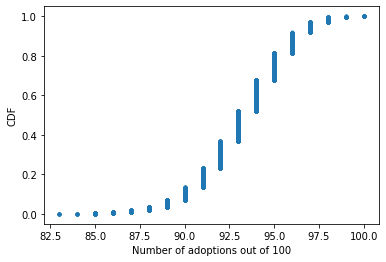

In [112]:
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Number of adoptions out of 100')
_ = plt.ylabel('CDF')
plt.show()

In [116]:
bins = np.arange(60, max(n_adopt) + 1.5) - 0.5

C:\Users\lacey\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


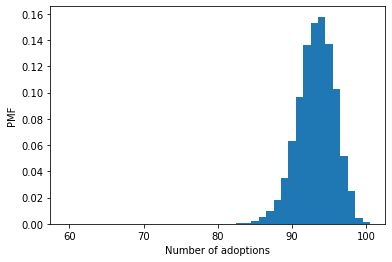

In [118]:
_ = plt.hist(n_adopt, normed=True, bins=bins)
_ = plt.xlabel('Number of adoptions')
_ = plt.ylabel('PMF')
plt.show()

In [121]:
#poisson distribution of shelter adoptions
shelter_pois = np.random.poisson(shelter_mean, size=10000)
pois_mean = np.mean(shelter_pois)
print(pois_mean)
#this implies that the mean shelter length is around 3 years

3.0291


In [124]:
pois_min = np.sum(shelter_pois <= 3)
pois_perc = pois_min/ 10000
print(pois_perc)
#we see that 64 percent of animals are adopted betweeen 0-3 years from this distribution

0.6416


In [125]:
adopt_mean = np.mean(aac6['age_of_outcome'])

In [127]:
#poisson distribution of age of adoptions
adopt_pois = np.random.poisson(adopt_mean, size=10000)
pois_adopt_mean = np.mean(adopt_pois)
print(pois_adopt_mean)
#this implies that the mean age of adoption is less than two

1.8343


In [128]:
adopt_min = np.sum(adopt_pois <=2)
adopt_perc = adopt_min/10000
print(adopt_perc)
#based on our distribution 72 percent of dogs adopted are 2 or less

0.7257


In [206]:
# want to look at subsets of breeds next such as percentage of specific breed adopted vs euthanized
#this will be helpful to identify significance with breeds
aac_pit = aac.set_index(['outcome_type']).loc[['Adoption', 'Euthanasia']]
aac_pit.tail()

,date_of_birth,outcome_datetime,animal_type,breed,intake_datetime,shelter_length,age_of_outcome,age_category,shelter_bin
outcome_type,,,,,,,,,
Euthanasia,1994-01-25,2014-09-17 11:18:00,Cat,Domestic Shorthair Mix,2014-01-25 13:53:00,33.0,20.0,"(11.0, 23.0]",NaN
Euthanasia,1994-11-21,2014-11-25 16:04:00,Cat,Domestic Shorthair Mix,2014-11-21 12:30:00,0.0,20.0,"(11.0, 23.0]","(-1.0, 1.0]"
Euthanasia,1997-06-11,2017-06-12 11:04:00,Cat,Domestic Shorthair Mix,2017-06-11 11:16:00,0.0,20.0,"(11.0, 23.0]","(-1.0, 1.0]"
Euthanasia,1994-10-11,2014-10-11 17:58:00,Cat,Domestic Medium Hair Mix,2014-10-11 17:26:00,0.0,20.0,"(11.0, 23.0]","(-1.0, 1.0]"
Euthanasia,1995-03-06,2017-03-06 17:09:00,Cat,Domestic Shorthair Mix,2017-03-06 16:31:00,0.0,22.0,"(11.0, 23.0]","(-1.0, 1.0]"


In [210]:
#since pitbulls are the top adopted as well as euthanized breeds, I wanted to run a simulation on these stats to see what the distributions look liked
aac_pit = aac_pit.reset_index().set_index(['breed']).loc['Pit Bull Mix']
aac_pit.head()

,outcome_type,date_of_birth,outcome_datetime,animal_type,intake_datetime,shelter_length,age_of_outcome,age_category,shelter_bin
breed,,,,,,,,,
Pit Bull Mix,Adoption,2017-01-28,2017-04-09 17:20:00,Dog,2017-04-04 11:59:00,0.0,0.0,"(-1.0, 1.0]","(-1.0, 1.0]"
Pit Bull Mix,Adoption,2017-06-14,2018-03-17 15:27:00,Dog,2018-02-14 15:45:00,4.0,0.0,"(-1.0, 1.0]","(3.0, 5.0]"
Pit Bull Mix,Adoption,2014-10-13,2015-06-28 18:26:00,Dog,2015-06-13 13:45:00,2.0,0.0,"(-1.0, 1.0]","(1.0, 2.0]"
Pit Bull Mix,Adoption,2016-05-06,2017-04-08 17:14:00,Dog,2017-04-04 15:44:00,0.0,0.0,"(-1.0, 1.0]","(-1.0, 1.0]"
Pit Bull Mix,Adoption,2017-06-14,2018-02-23 14:32:00,Dog,2018-02-14 18:56:00,1.0,0.0,"(-1.0, 1.0]","(-1.0, 1.0]"


In [233]:
#I have a dataframe set-up of all euthanized and adopted pit bulls so that I can run some comparisons
aac_pit.reset_index()
total_pit_euth = len(aac_pit[aac_pit.outcome_type != 'Adoption'])
print(total_pit_euth)

427


In [234]:
total_pit = len(aac_pit)
print(total_pit)

2751


In [235]:
total_pit_adopt = len(aac_pit[aac_pit.outcome_type != 'Euthanasia'])
print(total_pit_adopt)

2324


In [245]:
#prob of pit getting adopted
pit_prob = total_pit_adopt/ total_pit
print(pit_prob)

0.8447837150127226


In [246]:
n_pit = np.random.binomial(100, pit_prob, size=10000)

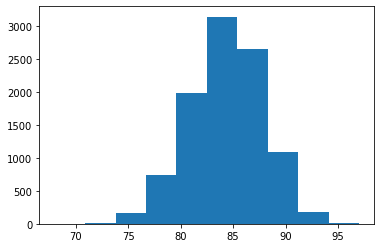

In [247]:
_ = plt.hist(n_pit)

In [248]:
x, y = ecdf(n_pit)

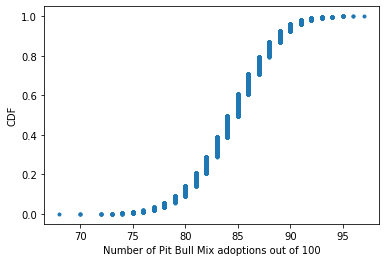

In [249]:
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Number of Pit Bull Mix adoptions out of 100')
_ = plt.ylabel('CDF')
plt.show()

In [260]:
pit_euth = aac_pit[aac_pit.outcome_type != 'Adoption']
pit_euth_mean = np.mean(pit_euth['age_of_outcome'])

In [261]:
pit_euth_pois = np.random.poisson(pit_euth_mean, size=10000)
pois_pit_mean = np.mean(pit_euth_pois)
print(pois_pit_mean)
#this implies the mean age of euthanasia is about 3 which is surprising low

3.0705


In [267]:
pit_min = np.sum(pit_euth_pois <=3)
pit_euth_perc = pit_min/10000
print(pit_euth_perc)
#this suggest that 64% of euthanized pit bulls are 3 and younger, which is really high

0.6314


In [265]:
#poisson of pits being adopted
pit_adopt = aac_pit[aac_pit.outcome_type != 'Euthanasia']
pit_adopt_mean = np.mean(pit_adopt['age_of_outcome'])

In [266]:
pit_adopt_pois = np.random.poisson(pit_adopt_mean, size=10000)
pois_adopt_mean = np.mean(pit_adopt_pois)
print(pois_adopt_mean)
#the mean age of adoption is 2 per the distribution

1.6948


In [270]:
pit_min_adopt = np.sum(pit_adopt_pois <=2)
pit_adopt_perc = pit_min_adopt/10000
print(pit_adopt_perc)
#distribution applies that 76% of adoptees are 2 and below

0.7618


In [ ]:
#want to do poisson distribution for labs as they were the most adopted breed


In [272]:
lab_adopted = aac6[aac6.breed == 'Labrador Retriever Mix']
lab_adopted.head()

,date_of_birth,outcome_datetime,breed,intake_datetime,shelter_length,age_of_outcome,age_category,shelter_bin
animal_type,,,,,,,,
Dog,2015-02-05,2015-06-24 18:52:00,Labrador Retriever Mix,2015-06-20 11:28:00,0.0,0.0,"(-1.0, 1.0]","(-1.0, 1.0]"
Dog,2015-02-19,2015-06-23 18:06:00,Labrador Retriever Mix,2015-06-19 13:02:00,0.0,0.0,"(-1.0, 1.0]","(-1.0, 1.0]"
Dog,2015-04-05,2015-06-24 17:00:00,Labrador Retriever Mix,2015-06-20 11:28:00,0.0,0.0,"(-1.0, 1.0]","(-1.0, 1.0]"
Dog,2014-12-23,2015-07-24 17:35:00,Labrador Retriever Mix,2015-06-23 00:45:00,4.0,0.0,"(-1.0, 1.0]","(3.0, 5.0]"
Dog,2014-12-21,2015-07-06 18:11:00,Labrador Retriever Mix,2015-06-21 16:19:00,2.0,0.0,"(-1.0, 1.0]","(1.0, 2.0]"


In [276]:
lab_mean = np.mean(lab_adopted['age_of_outcome'])

In [277]:
lab_adopt_pois = np.random.poisson(lab_mean, size=10000)
lab_adopt_mean = np.mean(lab_adopt_pois)
print(lab_adopt_mean)
#mean age of adoption for labs is 1.5 

1.3793


In [278]:
lab_min_adopt = np.sum(lab_adopt_pois <=2)
lab_adopt_perc = lab_min_adopt/10000
print(lab_adopt_perc)
#this shows that 83% of labs are adopted 2 and below

0.8394


In [280]:
lab_adopted = len(aac6[aac6.breed == 'Labrador Retriever Mix'])
print(lab_adopted)

2368


In [282]:
total_adopt = len(aac6)
print(total_adopt)

20580


In [284]:
#wanted to see total amount of dogs adopted that were labs and run distribution on them
lab_prob = lab_adopted/ total_adopt
print(lab_prob)

0.11506316812439261


In [285]:
n_lab = np.random.binomial(100, lab_prob, size=10000)

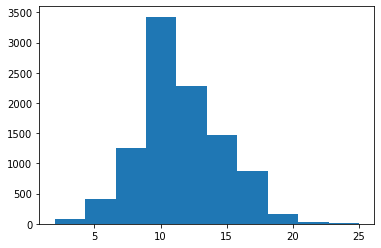

In [286]:
_ = plt.hist(n_lab)

In [287]:
x, y = ecdf(n_lab)

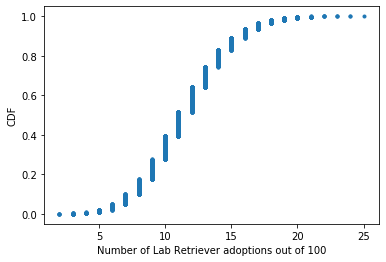

In [288]:
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Number of Lab Retriever adoptions out of 100')
_ = plt.ylabel('CDF')
plt.show()

In [292]:
lab_euth = aac5[aac5.breed == 'Labrador Retriever Mix']
lab_euth_mean = np.mean(lab_euth['age_of_outcome'])
print(lab_euth_mean)

4.872881355932203


In [293]:
lab_euth = len(aac5[aac5.breed == 'Labrador Retriever Mix'])
print(lab_euth)

118


In [295]:
total_lab = lab_euth + lab_adopted
print(total_lab)

2486


In [296]:
lab_prob_euth = lab_euth/ total_lab
print(lab_prob_euth)

0.04746580852775543


In [297]:
n_lab_euth = np.random.binomial(100, lab_prob_euth, size=10000)

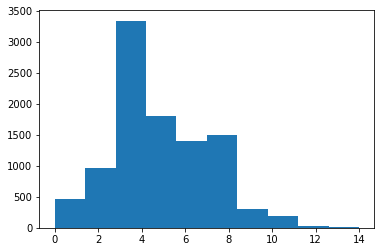

In [298]:
_ = plt.hist(n_lab_euth)

In [299]:
x, y = ecdf(n_lab_euth)

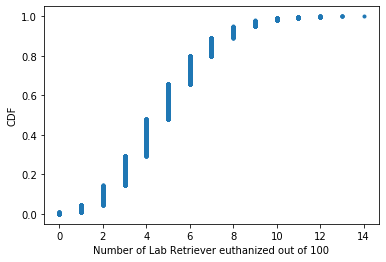

In [300]:
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Number of Lab Retriever euthanized out of 100')
_ = plt.ylabel('CDF')
plt.show()